### Mouselinos Spyridon
#### HomeWork 2
#### January 2020
***

In [1]:
### Imports 
import numpy as np
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
### Random Seed Used For Experiments is 666
np.random.seed(666)

### Exercise 1
***

#### A) Data Generation

***

In [3]:
## Data Generation
## Let's assume that our Data points derive from a multivariate Normal Distribution with independent samples.
## We use a list that holds the means of X_1 and X_2 during the generation.
mean = [0,0]
## And the respective covariance matrix in the form of two lists.
cov = [[1,0],[0,1]]

X = np.random.multivariate_normal(mean,cov,200)

#The model is of the form 𝑦 = θ0 +θ1*𝑥1 +θ2*𝑥2 +θ3*𝑥1𝑥2 +𝜂
def f(X,theta):
    return theta[0] + theta[1]*X[:,0] + theta[2]*X[:,1]+ theta[3]*X[:,0]*X[:,1]

### Now the parameter vector 𝜃 is stored below:
theta = [3,2,1,1]
Y = f(X,theta)
### As far as the noise we add it as a normal distribution sampled point with variance 0.05
Y = Y + np.random.normal(0,np.sqrt(0.05),len(X))

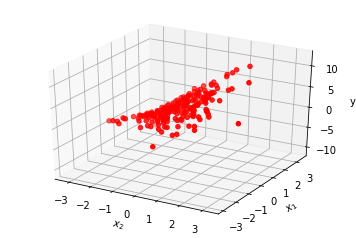

In [4]:
#### Let's Plot Our Data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y,c='r',marker='o')
ax.set_xlabel('$x_2$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('y')
plt.show()

#### B) Data Transformation
***

In [5]:
### We will apply the tranformation X vector to transform it from a 2D into a 3D vector of values (x1,x2,x1*x2)
print("The shape of our data before the transformation is {}".format(X.shape))
x1_vector = X[:,0]
x2_vector = X[:,1]
x1x2_vector = x1_vector * x2_vector
X = np.stack([x1_vector,x2_vector,x1x2_vector],axis=1)
print("The shape of our data after the transformation is {}".format(X.shape))

The shape of our data before the transformation is (200, 2)
The shape of our data after the transformation is (200, 3)


#### C) Linear Modeling and solution under MSE
***

In [6]:
### Under the linear model that 𝑦 = θ0 +θ1*𝑥1 +θ2*𝑥2 +θ3*𝑥1𝑥2 we will need to create the following matrices
### and then solve to get the final parameter matrix

### First let's add a leading 1 to the X matrix
X = np.c_[np.ones(200),X]

### Now let's calculate the X^T matrix
XT = np.transpose(X)

### Now the X^T * X
XTX = np.matmul(XT,X)

### Now the inverse of (XT * X) --> (XT *X)^(-1)
invXTX = inv(XTX)

### Now the Θ parameter vector can be given as
theta_new = np.matmul(np.matmul(invXTX,XT),Y)

In [7]:
print("The original parameter vector is: {}".format(theta))
print("***************************************************")
print("The fitted parameter vector is: {}".format(theta_new))

The original parameter vector is: [3, 2, 1, 1]
***************************************************
The fitted parameter vector is: [2.97510714 2.00802937 1.01555548 1.01530671]


#### Let's calculate the MSE of our fitted model for fun

In [8]:
y_predicted = np.matmul(X,theta_new)
error = Y - y_predicted
square_error = error*error
mse = square_error.mean()

In [9]:
print("The MSE is: {}".format(mse))

The MSE is: 0.054563539149901225


### Exercise 2
***

#### A) Data Generation
***

In [10]:
### We will create 2000 points that will span from -2 to +2 uniformly both in x1 and x2 dimension.
### For this reason we will create the following generator
X = np.random.uniform(low=-2,high=+2,size=(2000,2))

### The respective class Vector Y will be determined by the following criterion:
### If x2^2 - x1^2 >=0 assign 1 else assign -1. (Tiebreaker = is considered class 1)

Y = np.sign(X[:,1]**2 - X[:,0]**2)

In [11]:
#### Let's Plot Our Data with their respective Class

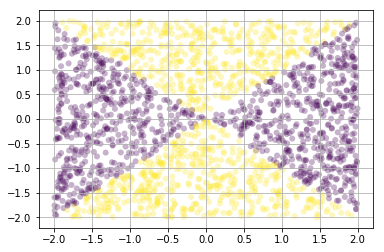

In [12]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=Y,  label=Y, alpha=0.3, edgecolors='none')
ax.grid(True)
plt.show()

In [13]:
### We can see that our data can not be linearly classified into their respective classes

#### B) Data Transformation
***

In [14]:
### We will apply the tranformation X vector to transform it from a 2D into a 2D vector of values (x1**2,x2**2)
print("The shape of our data before the transformation is {}".format(X.shape))
x1_vector = X[:,0]
x2_vector = X[:,1]
x1_squared_vector = x1_vector ** 2
x2_squared_vector = x2_vector ** 2

X = np.stack([x1_squared_vector, x2_squared_vector],axis=1)
print("The shape of our data after the transformation is {}".format(X.shape))

The shape of our data before the transformation is (2000, 2)
The shape of our data after the transformation is (2000, 2)


#### C) Plot and comparison
***

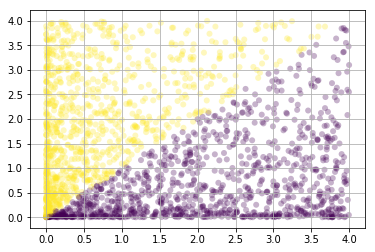

In [15]:
### Let's Plot them again after the transformation
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=Y,  label=Y, alpha=0.3, edgecolors='none')
ax.grid(True)
plt.show()

In [16]:
### We can see that now our data are linearly separable

#### D) Linear Modeling and solution under MSE
***

In [17]:
### Under the linear model that 0 = θ0 +θ1*𝑥1**2 +θ2*𝑥2**2 we will need to create the following matrices
### and then solve to get the final parameter matrix

### First let's add a leading 1 to the X matrix
X = np.c_[np.ones(2000),X]

### Now let's calculate the X^T matrix
XT = np.transpose(X)

### Now the X^T * X
XTX = np.matmul(XT,X)

### Now the inverse of (XT * X) --> (XT *X)^(-1)
invXTX = inv(XTX)

### Now the Θ parameter vector can be given as
theta_new = np.matmul(np.matmul(invXTX,XT),Y)

In [18]:
#### Note: This parameter vector gives us the line that separates our data after the transformation
theta_new

array([ 0.05629487, -0.47557002,  0.44909864])

In [19]:
def split_line(bias,slope,X1):
    return X1*slope + bias

#### Let's Plot our Line

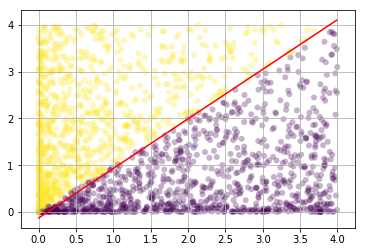

In [20]:
X1_line = np.arange(0,4,0.01)
Y_line = split_line(bias=-theta_new[0]/theta_new[2], slope=-theta_new[1]/theta_new[2],X1=X1_line)
### Let's Plot them again after the transformation
fig, ax = plt.subplots()
ax.plot(X1_line,Y_line,'r')
ax.scatter(X[:,1], X[:,2], c=Y,  label=Y, alpha=0.3, edgecolors='none')
ax.grid(True)
plt.show()